# Scattering by a Hard Sphere

## Part A

Import special libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn, spherical_yn, legendre

Define $\delta_l$ (formula taken from your notes)

In [2]:
def delta_l(kR, l):
    return np.arctan(spherical_jn(n=l, z=kR)/spherical_yn(n=l, z=kR))

Define $\sigma/R^2$ and $k^2 \sigma$ (formula for $\sigma$ as a function of $l$ and $\delta_l$ taken from your notes).

In [3]:
def cross_tot_R2(kR, order=100):
    return 4*np.pi/(kR**2) * np.sum([(2*l+1)*np.sin(delta_l(kR, l))**2 for l in range(order)], axis=0)

def cross_tot_k2(kR, order=100):
    return 4*np.pi * np.sum([(2*l+1)*np.sin(delta_l(kR, l))**2 for l in range(order)], axis=0)

Get values

In [4]:
kRs = np.linspace(1,100,100)
cross_div_R2 = cross_tot_R2(kRs)
cross_times_k2 = cross_tot_k2(kRs)

Plot.

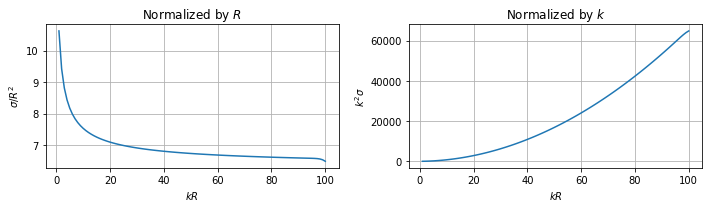

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(kRs, cross_div_R2)
ax[1].plot(kRs, cross_times_k2)
ax[0].set_ylabel('$\sigma/R^2$')
ax[0].set_xlabel('$kR$')
ax[1].set_ylabel('$k^2 \sigma$')
ax[1].set_xlabel('$kR$')
ax[0].set_title('Normalized by $R$')
ax[1].set_title('Normalized by $k$')

[a.grid() for a in ax]

fig.tight_layout()

* The **left plot** shows that if we hold $R$ constant and increase $k$, the total cross section decreases. This implies that a smaller percentage of energy in the incident wave is being scattered: since the wave has higher energy, this is expected.

* The **right plot** shows that if we hold $k$ constant and increase $R$, the total cross section increases. The larger solid sphere in the center causes more of the wave to be scattered.

## Part B

Define $d\sigma/d\Omega$ as a function of $l$ and $\delta_l$ (taken from your notes),

In [6]:
def d_sig_d_omega(theta, kR, order=80):
    return np.abs(np.sum([(2*l+1)\
                   *np.exp(1j*delta_l(kR, l))\
                   *np.sin(delta_l(kR, l))\
                   *legendre(l)(np.cos(theta))\
                   for l in range(order)], axis=0))**2

Get all quantities.

In [7]:
thetas = np.linspace(0, np.pi, 200)
dsdt_1 = d_sig_d_omega(thetas, 0.1)
dsdt_2 = d_sig_d_omega(thetas, 0.5)
dsdt_3 = d_sig_d_omega(thetas, 1)
dsdt_4 = d_sig_d_omega(thetas, 2)
dsdt_5 = d_sig_d_omega(thetas, 10)

dsdts=[dsdt_1, dsdt_2, dsdt_3, dsdt_4, dsdt_5]
labels=[0.1, 0.5, 1, 2, 10]

Plot seperately

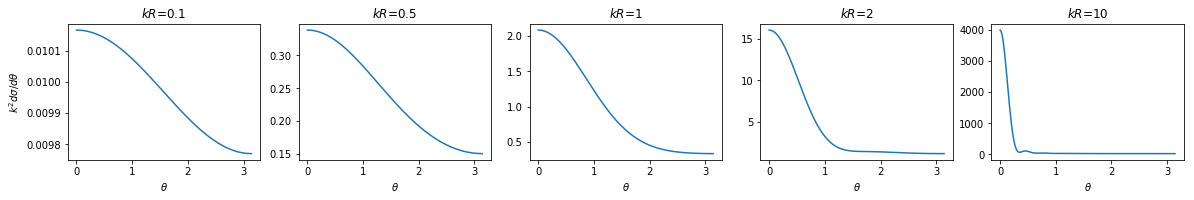

In [8]:
fig, ax = plt.subplots(1,5,figsize=(20,2.5))
for dsdt, label, a in zip(dsdts, labels, ax):
    a.plot(thetas, dsdt)
    a.set_title(r'$kR$={}'.format(label))
[a.set_xlabel(r'$\theta$') for a in ax]
ax[0].set_ylabel(r'$k^2 d\sigma/d\theta$')
plt.show()

Clearly more energy means a larger proportion of the cross section is in the forward direction.

Plot together using normalization.

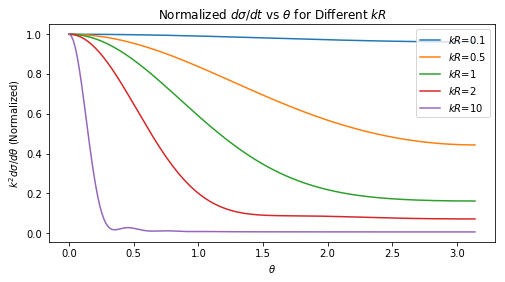

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for dsdt, label in zip(dsdts, labels):
    ax.plot(thetas, dsdt/max(dsdt), label='$kR$={}'.format(label))
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$k^2 d\sigma/d\theta$ (Normalized)')
ax.set_title(r'Normalized $d\sigma/dt$ vs $\theta$ for Different $kR$')
ax.legend(loc='upper right')
plt.show()

Special for $kR=10$

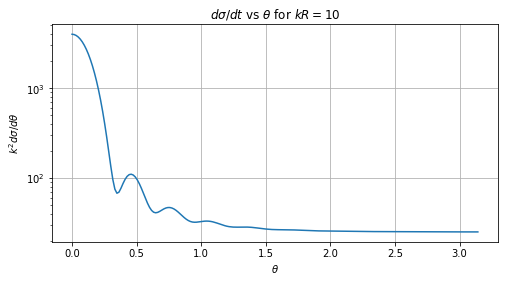

In [10]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.semilogy(thetas, dsdt_5)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$k^2 d\sigma/d\theta$')
ax.set_title(r'$d\sigma/dt$ vs $\theta$ for $kR=10$')
ax.grid()
plt.show()

The plot from Jackson is

<img src="A5pic.PNG" width="400" height="200">

This resembles the $kR=10$ plot. Note that since $k \propto \lambda^{-1}$ this corresponds to the case where $R$ is ``much bigger'' than the wavelength of light. Since $\lambda$ is typically very small for visible light, this is closer to the macroscopic scale than the other values of $kR$.

Most of the contribution to the cross section is in the forward direction ($\theta=0$) and as $\theta$ gets increases we get less and less contribution to the cross section. The physical reason for this is that it is preferential for the wave to continue forwards in its initial direction and energetically unfavourable to reverse direction.

The oscillations are due to the diffraction pattern of scattering, where the (bent) scattered waves interfere with eachother to produce areas of larger and smaller amplitude.